# Finding Heavy Traffic Indicators on I-94
- We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94)
- To determine indicators of heavy traffic on I-94 (weather type, time of the day, time of the week, etc.)

## 1. The dataset
- John Hogue made the dataset available, and We can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)
- The dataset documentation mentions:
    1. A station located approximately midway between Minneapolis and Saint Paul recorded the traffic data;
    2. The station only records westbound traffic (cars moving from east to west).
- Hence, we should avoid generalizing our results for the entire I-94 highway.

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## 2. Analyzing Traffic Volume
- we're going to plot 
    1. a histogram to visualize the distribution of the traffic_volume column;
    2. a correlation matrix map to find the most related attributes.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

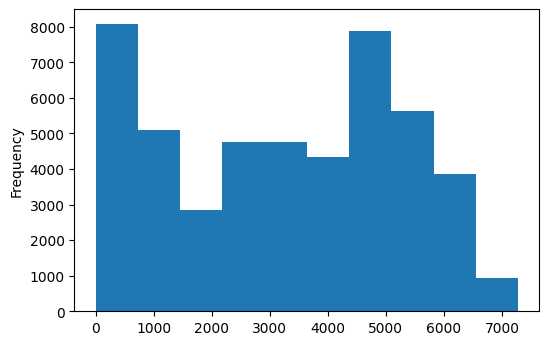

In [5]:
traffic['traffic_volume'].plot.hist()
plt.plot()
plt.show()

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

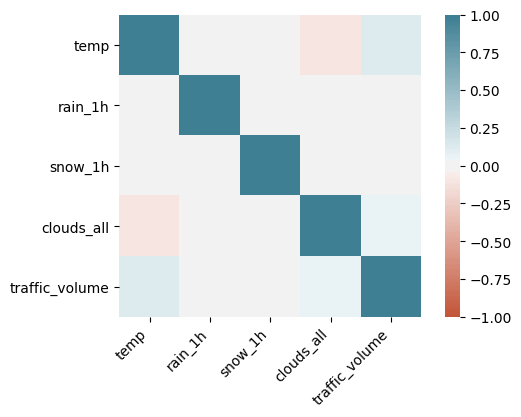

In [7]:
# Correlation Matrix Map

import seaborn as sns
ax = sns.heatmap(traffic.corr(),
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

1. The range of hourly traffic volume is 0--7280
2. There is a 25% chance has only 1193 cars or less pass through the station per hour
    - We can assume it happened at night, or a road is closed. 
3. There is another 25% chance has more than 4933 cars through the station per hour
    - The traffic volume was four times as much
4. The most related attributes are clouds and temp

- Therefore, we will compare daytime data with nighttime data at first.

## 3. Day VS. Night 

- Daytime data: hours from 7 AM to 7 PM (12 hours)
- Nighttime data: hours from 7 PM to 7 AM (12 hours)

In [8]:
# Transform the date_time column to datetime by using the function pd.to_datetime()
traffic['date_time'] = pd.to_datetime(traffic['date_time']) 

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) 
                   & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) 
                     | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


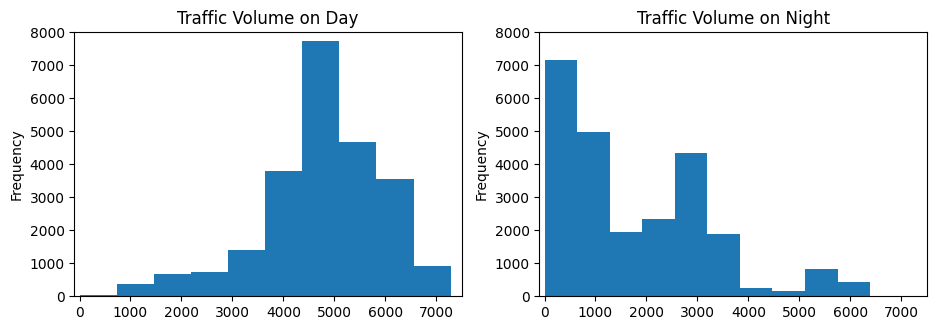

In [9]:
plt.figure(figsize = (11,3.5))

plt.subplot(1,2,1)
day['traffic_volume'].plot.hist()
plt.title('Traffic Volume on Day')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.subplot(1,2,2)
night['traffic_volume'].plot.hist()
plt.title('Traffic Volume on Night')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.show()

In [10]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

- Day: 
    - most of the traffic volume values are high (left-skewed)
    - 75% of values are less than 5559
- Night: 
    - most of the traffic volume values are low (right-skewed)
    - 75% of values are less than 2819
    
- Based on our goal(find indicators of heavy traffic), we'll only focus on the daytime data moving forward.


## 4. Indicators

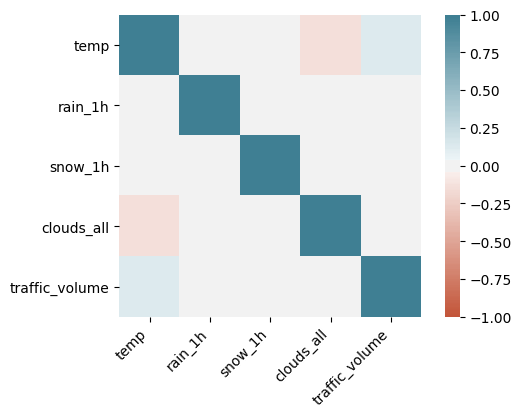

In [12]:
# Correlation Matrix Map

import seaborn as sns
ax = sns.heatmap(day.corr(),
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- The first possible indicator of heavy traffic is time. We assume some specific time, day, month are related to heavy traffic
- We will visualize the data to try to determine how the traffic volume changes according to the following attributes:
    1. Month
    2. Day
    3. Time

### 4.1 Month

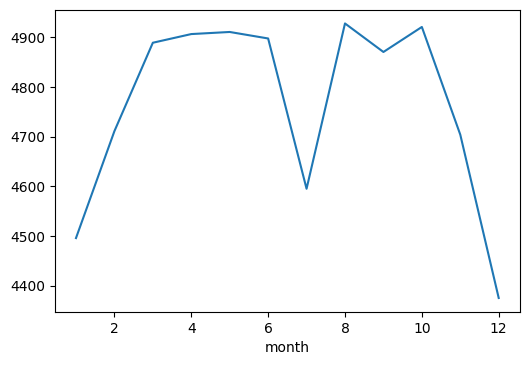

In [13]:
# create a new column where each value describes the month
day['month'] = day['date_time'].dt.month

# group the dataset by the month column
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

- The heavy traffic happens in the warm months(Mar-Oct) instead of cold months (Nov-Feb)
- There is an exception: July

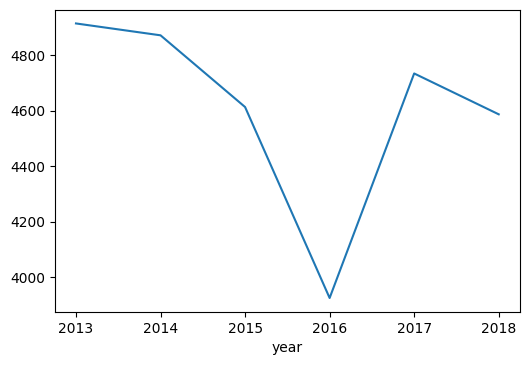

In [14]:
# see what happened in July (compare with other years)
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

- The only exception that happened in 2016
- If we google "I-94 July 2016", we will see there are some news about a protest: [
NATION & WORLD
Protesters shut down I-94 in St. Paul;](https://www.chicagotribune.com/nation-world/ct-police-shooting-protests-20160709-story.html), which might be one of the reasons.

In general, we can make some conclusions: 
1. Warm months generally show heavier traffic compared to cold months. 
2. In a warm month, about 5000 cars pass the road hourly during the daytime.

### 4.2 Day

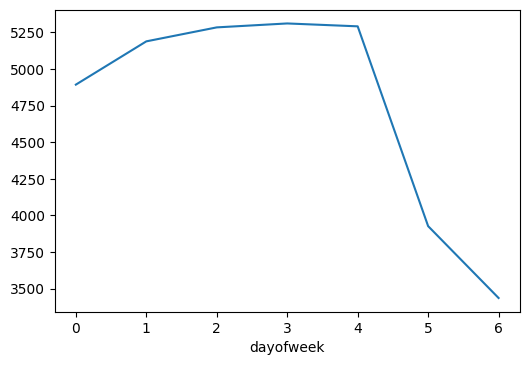

In [15]:
# get the traffic volume averages for each day of the week
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

1. Traffic is heavier on weekdays, with values about 5000 cars.
3. Traffic is lighter on weekends, with values below 4000 cars.

### 4.3 Time

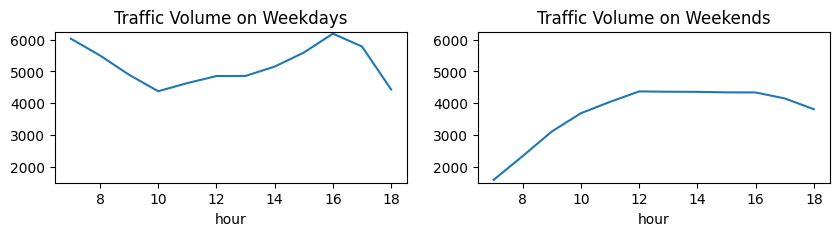

In [16]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()
plt.figure(figsize = (10,2))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.ylim(1500, 6250)
plt.title('Traffic Volume on Weekdays')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.ylim(1500, 6250)
plt.title('Traffic Volume on Weekends')
plt.show()

- The traffic volume is generally higher during weekdays compared to the weekends.

- From the plot, we can know the rush hours are around 7 and 16, which is similar to the peak time defined by TFL: 
    - Monday to Friday (not on public holidays) between 06:30 and 09:30, and between 16:00 and 19:00
- There are more than 6000 cars at rush hours.

#### To summarize, we found a few time-related indicators of heavy traffic:

1. The traffic is usually heavier during warm months (March–October) than cold months (November–February).
2. The traffic is usually heavier on business days compared to weekends.
3. On weekdays, the rush hours are around 7 and 16.

### 4.4 Weather

- The weather data we have: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description
- Most of them are numerical:
   - find more details on the correlation

In [17]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

- The strongest correlation with the traffic volume in the unanalyzed data is just +0.13. 
- The others (rain_1h, snow_1h, clouds_all) don't show any obvious correlation with traffic volume.

#### 4.4.1 Temperature

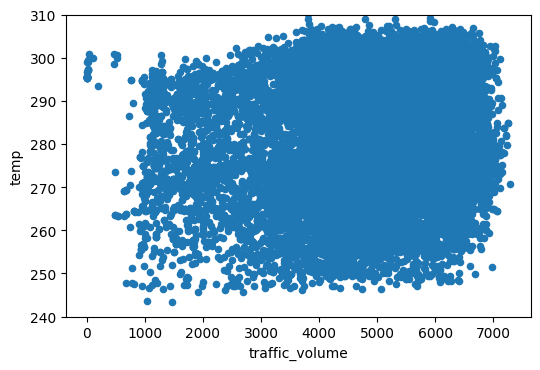

In [18]:
day.corr()['traffic_volume']
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(240, 310) 
plt.show()

- We can infer that there is no significant relationship between temperature and traffic volume.

#### 4.4.2 Weather Types

- To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description:
    -  create a bar plot for the traffic_volume column of by_weather_main and by_weather_description.

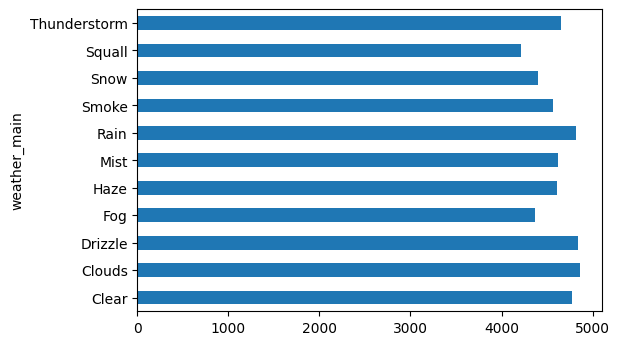

In [19]:
# group data by different types
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()

- there is no significant relationship between them and traffic volume.
- let's try to extract some useful information from weather_description

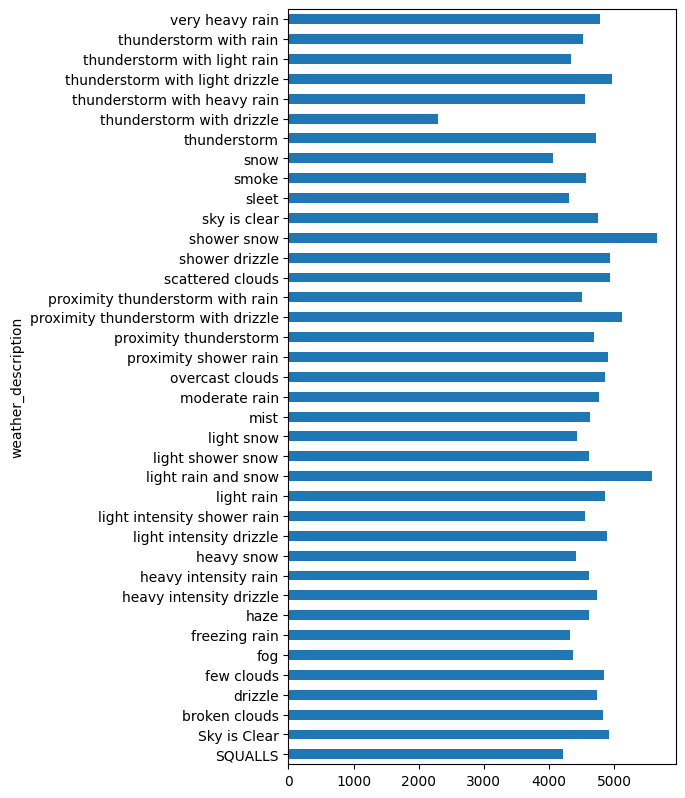

In [20]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))

- As we can see, there are three weather types where traffic volume exceeds 5000:
1. Shower snow
2. Light rain and snow
3. Proximity thunderstorm with drizzle

- What we don't know is why these weather types have the highest average traffic volume (Personally, I  don't want to get wet in these weather).

## 5. Conclusion

In this project, we tried to determine indicators of heavy traffic on the I-94 highway based on the followed attributes:

1. Time 
- The traffic is usually heavier during warm months (March–October) than cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On weekdays, the rush hours are around 7 and 16.

2. Weather
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle